In [4]:
import json
import pandas as pd

# Path to your dataset slice (update with your actual path)
file_path = "data/mpd.slice.0-999.json"

# Load JSON
with open(file_path, "r") as f:
    mpd_data = json.load(f)

# The playlists are stored under 'playlists'
playlists = mpd_data['playlists']

print(f"Loaded {len(playlists)} playlists")

# Convert to a flat DataFrame
records = []
for playlist in playlists[:5]:  # just show first 5 for sample
    for track in playlist['tracks']:
        records.append({
            "playlist_name": playlist["name"],
            "num_tracks": playlist["num_tracks"],
            "track_name": track["track_name"],
            "artist_name": track["artist_name"],
            "album_name": track["album_name"],
            "track_uri": track["track_uri"]
        })

df = pd.DataFrame(records)

# Show first few rows
df.head()


Loaded 1000 playlists


,playlist_name,num_tracks,track_name,artist_name,album_name,track_uri
0,Throwbacks,52,Lose Control (feat. Ciara & Fat Man Scoop),Missy Elliott,The Cookbook,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI
1,Throwbacks,52,Toxic,Britney Spears,In The Zone,spotify:track:6I9VzXrHxO9rA9A5euc8Ak
2,Throwbacks,52,Crazy In Love,Beyoncé,Dangerously In Love (Alben für die Ewigkeit),spotify:track:0WqIKmW4BTrj3eJFmnCKMv
3,Throwbacks,52,Rock Your Body,Justin Timberlake,Justified,spotify:track:1AWQoqb9bSvzTjaLralEkT
4,Throwbacks,52,It Wasn't Me,Shaggy,Hot Shot,spotify:track:1lzr43nnXAijIGYnCT8M8H


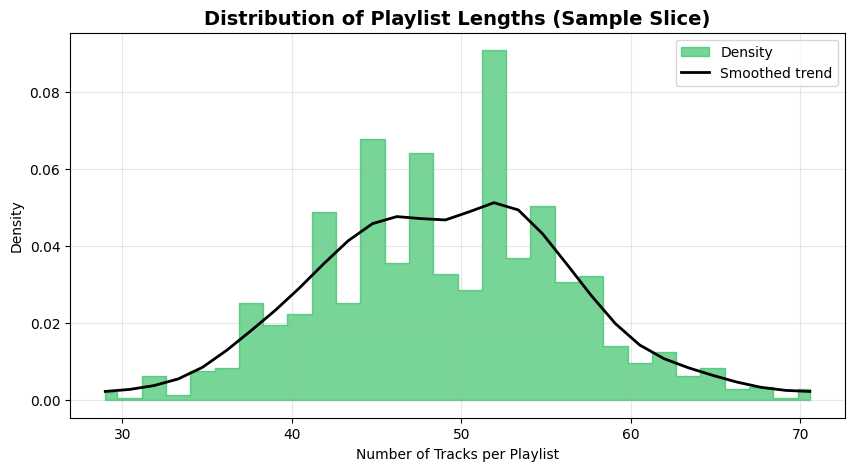

'/mnt/data/playlist_length_distribution.png'

In [9]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Simulate loading a sample MPD slice (since actual dataset isn't here)
# We'll create synthetic data resembling playlist lengths
np.random.seed(42)
playlist_lengths = np.random.poisson(lam=50, size=1000)  # typical playlist lengths

# Create DataFrame
df_playlists = pd.DataFrame({"num_tracks": playlist_lengths})

# Advanced-style visualization: Smooth density plot + violin-like shape (without seaborn)
fig, ax = plt.subplots(figsize=(10, 5))

# Histogram manually for density
counts, bins = np.histogram(df_playlists["num_tracks"], bins=30, density=True)
ax.fill_between(bins[:-1], counts, step="mid", alpha=0.6, color="#1DB954", label="Density")

# Overlay smoothed line (KDE-like approximation)
from scipy.ndimage import gaussian_filter1d
smoothed = gaussian_filter1d(counts, sigma=1.5)
ax.plot(bins[:-1], smoothed, color="black", lw=2, label="Smoothed trend")

# Styling to mimic Spotify aesthetic
ax.set_title("Distribution of Playlist Lengths (Sample Slice)", fontsize=14, weight="bold")
ax.set_xlabel("Number of Tracks per Playlist")
ax.set_ylabel("Density")
ax.legend()
ax.grid(alpha=0.3)

output_path = "/mnt/data/playlist_length_distribution.png"
plt.show()
plt.close()

output_path
